In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from feature_engine.encoding import OrdinalEncoder

In [2]:
data = pd.read_csv(
    "houseprice.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["Neighborhood", "Exterior1st", "Exterior2nd"]],
    data["SalePrice"], 
    test_size=0.3,  
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [4]:
X_train.columns

Index(['Neighborhood', 'Exterior1st', 'Exterior2nd'], dtype='object')

In [5]:
ordinal_enc = OrdinalEncoder(encoding_method="ordered",
                             variables=list(X_train.columns))

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [6]:
ordinal_enc.encoder_dict_

{'Neighborhood': {'IDOTRR': 0,
  'BrDale': 1,
  'MeadowV': 2,
  'Edwards': 3,
  'BrkSide': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'Blueste': 7,
  'SWISU': 8,
  'NPkVill': 9,
  'NAmes': 10,
  'Mitchel': 11,
  'SawyerW': 12,
  'Gilbert': 13,
  'NWAmes': 14,
  'Blmngtn': 15,
  'CollgCr': 16,
  'ClearCr': 17,
  'Crawfor': 18,
  'Somerst': 19,
  'Veenker': 20,
  'Timber': 21,
  'NridgHt': 22,
  'StoneBr': 23,
  'NoRidge': 24},
 'Exterior1st': {'BrkComm': 0,
  'AsphShn': 1,
  'CBlock': 2,
  'AsbShng': 3,
  'WdShing': 4,
  'Wd Sdng': 5,
  'MetalSd': 6,
  'HdBoard': 7,
  'Plywood': 8,
  'Stucco': 9,
  'BrkFace': 10,
  'VinylSd': 11,
  'CemntBd': 12,
  'Stone': 13,
  'ImStucc': 14},
 'Exterior2nd': {'AsphShn': 0,
  'CBlock': 1,
  'AsbShng': 2,
  'Brk Cmn': 3,
  'Wd Shng': 4,
  'MetalSd': 5,
  'Stone': 6,
  'Wd Sdng': 7,
  'Plywood': 8,
  'HdBoard': 9,
  'Stucco': 10,
  'BrkFace': 11,
  'ImStucc': 12,
  'VinylSd': 13,
  'CmentBd': 14,
  'Other': 15}}

In [7]:
ordinal_enc.variables_

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [8]:
X_train= ordinal_enc.transform(X_train)
X_test= ordinal_enc.transform(X_test)

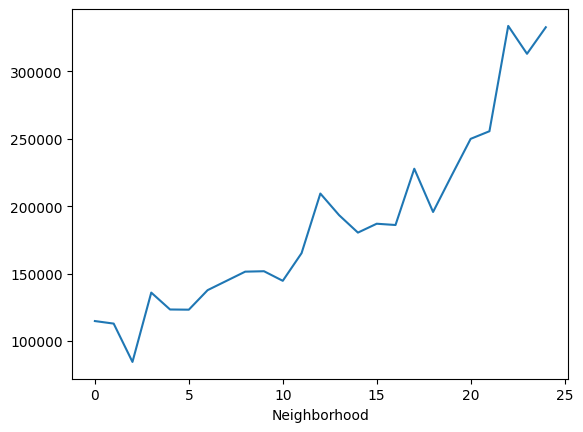

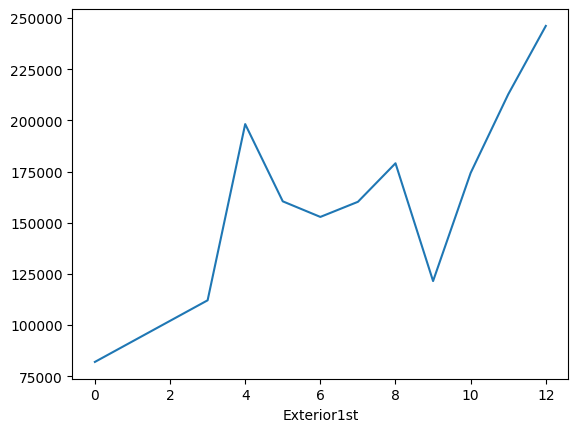

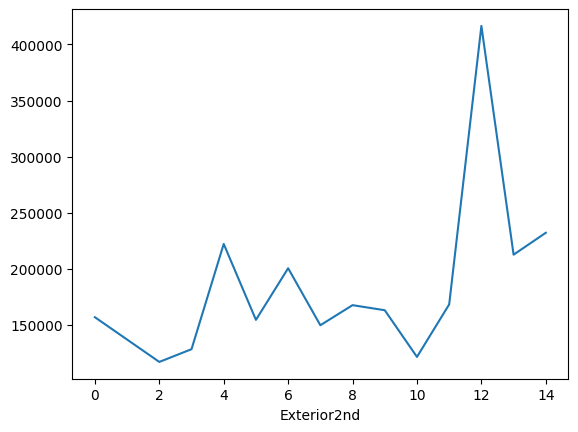

In [9]:
for col in X_test.columns:
    fig = plt.figure()
    fig = y_test.groupby(X_test[col]).mean().plot()
    plt.show()